In [68]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None

df = pd.read_csv(r'C:\Users\gerry\Documents\Data Notes\csv downloads\Dog Breed vs intellegence\excel files\Combined.csv')

In [79]:
df.head()

,Index,Breed,hight_low_inches,hight_high_inches,inches_average,weight_low_lbs,weight_high_lbs2,weight_average,Size Group,Breed Classification,IQ Classification,Obey,Reps_lower,Reps_upper
0,18.0,Alaskan Malamute,0.0,0.0,0.0,0,0.0,0.0,Teacup,Working Group,Average Working/Obedience Intelligence,0.50,26.0,40.0
1,111.0,Coton de Tulear,0.0,0.0,0.0,0,0.0,0.0,Teacup,Non Sporting Group,NaN,NaN,NaN,NaN
2,139.0,Chihuahua,6.0,9.0,7.5,2,5.0,3.5,Teacup,Toy Group,Fair Working/Obedience Intelligence,0.30,41.0,80.0
3,143.0,Maltese,8.0,10.0,9.0,4,6.0,5.0,Toy,Toy Group,Fair Working/Obedience Intelligence,0.30,41.0,80.0
4,146.0,Pomeranian,12.0,12.0,12.0,3,7.0,5.0,Toy,Toy Group,Excellent Working Dogs,0.85,5.0,15.0


In [84]:
# looping through all columns for null values and dropping rows without values

for col in df.columns:
    missing_values = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round( missing_values*100)))
    
df = df.dropna(subset=['Obey', 'inches_average', 'weight_average'])

Index - 1%
Breed - 1%
hight_low_inches - 9%
hight_high_inches - 9%
inches_average - 9%
weight_low_lbs - 8%
weight_high_lbs2 - 9%
weight_average - 9%
Size Group - 9%
Breed Classification - 1%
IQ Classification - 15%
Obey - 15%
Reps_lower - 15%
Reps_upper - 15%


In [85]:
# looking at data types for the columns to ensure the correct data type

df.dtypes

Index                   float64
Breed                    object
hight_low_inches        float64
hight_high_inches       float64
inches_average          float64
weight_low_lbs           object
weight_high_lbs2        float64
weight_average          float64
Size Group               object
Breed Classification     object
IQ Classification        object
Obey                    float64
Reps_lower              float64
Reps_upper              float64
dtype: object

<function matplotlib.pyplot.show(close=None, block=None)>

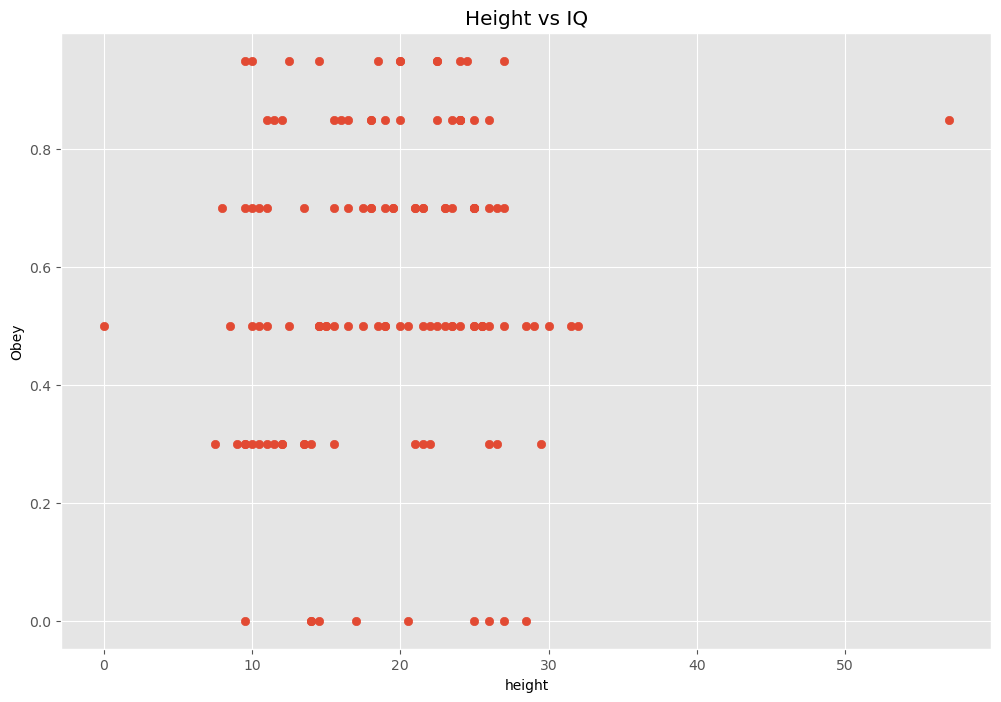

In [90]:
 #plotting scatther plot with height vs IQ
plt.scatter(x=df['inches_average'], y=df['Obey'])
plt.title('Height vs IQ')
plt.xlabel('height')
plt.ylabel('Obey')
plt.show

<Axes: xlabel='weight_average', ylabel='Obey'>

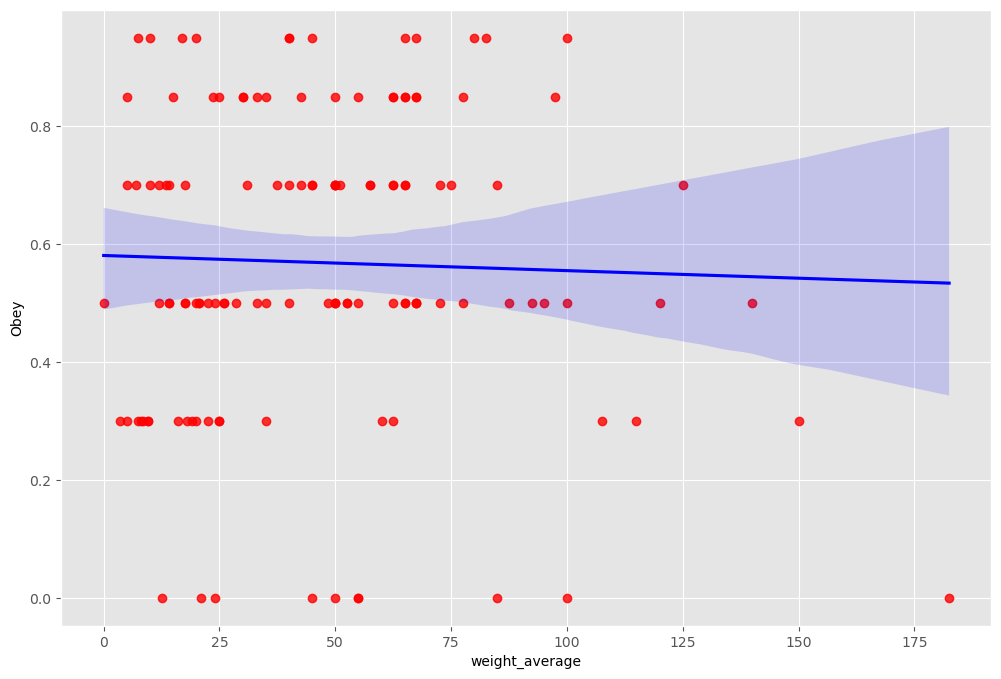

In [94]:
 #plotting regression scatther plot with weight vs IQ
sns.regplot(x='weight_average', y='Obey', data=df, scatter_kws={"color": "red"}, line_kws={"color": "blue"})


C:\Users\gerry\AppData\Local\Temp\ipykernel_16500\1281488484.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix=df.corr()


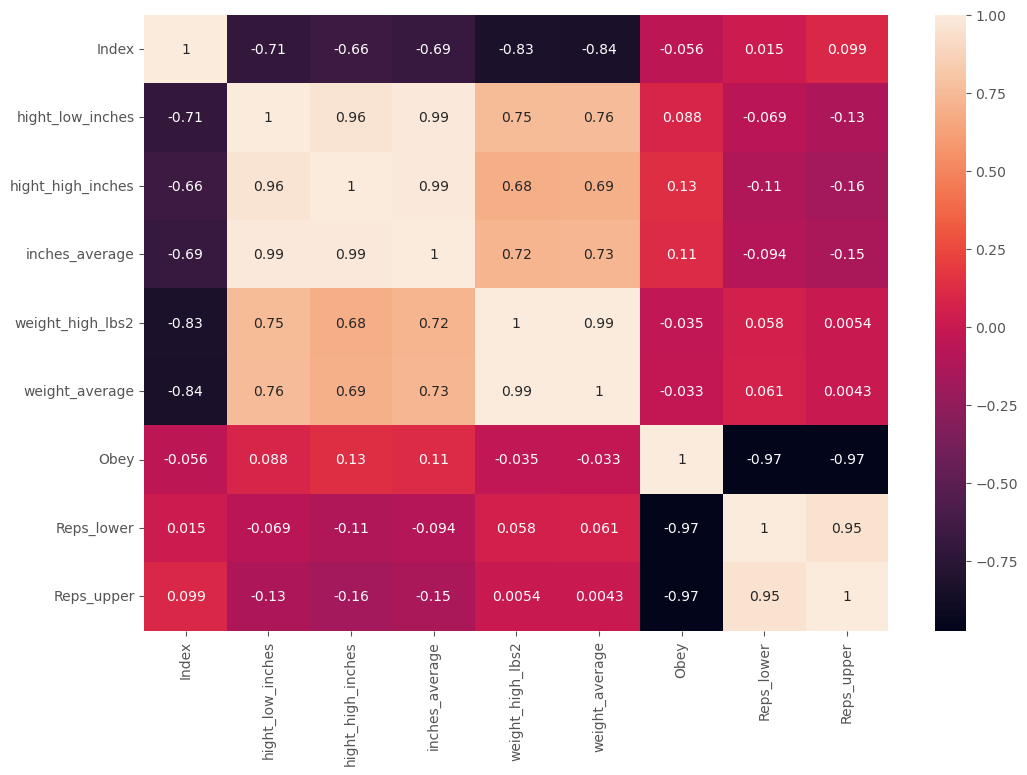

In [98]:
#correlation matrix data with heatmap
correlation_matrix=df.corr()
sns.heatmap(correlation_matrix, annot=True)
plt.title('Coreelartion Heat Map')
plt.show()

In [102]:
#numerizing data for further correlations
df_numerized = df
for col_name in df_numerized.columns:
    if(df_numerized[col_name].dtype =='object'):
        df_numerized[col_name] = df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes

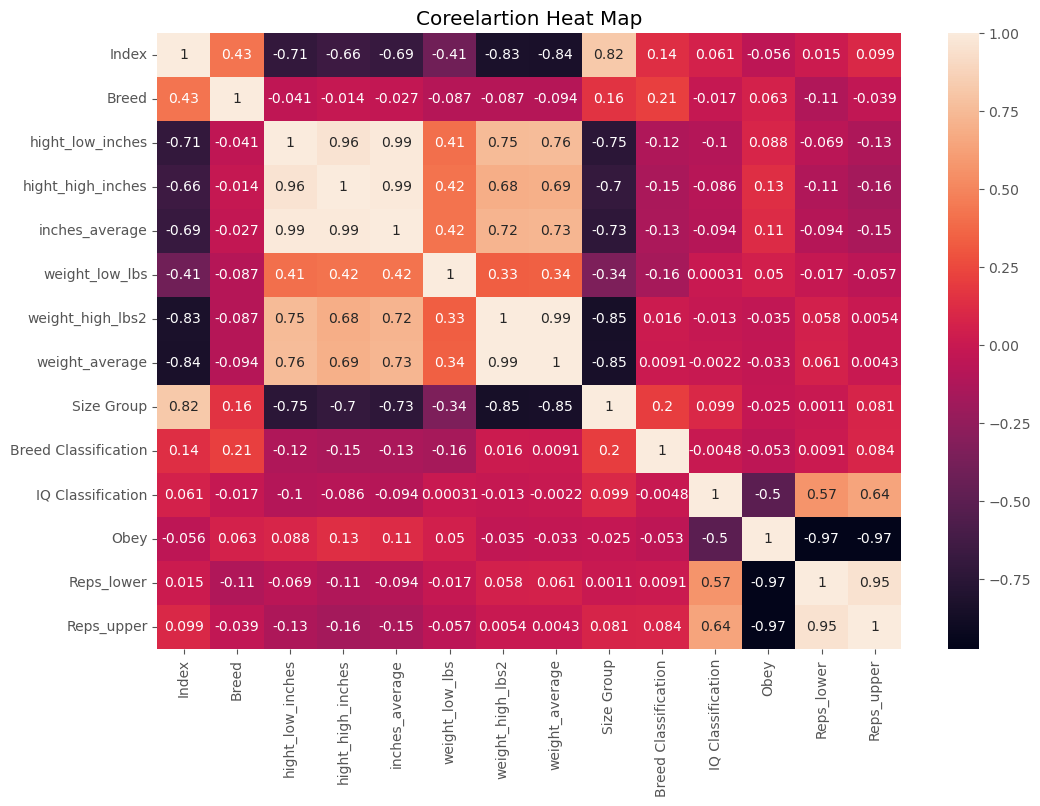

In [104]:
# running correlation heatmap with new numerized data
correlation_matrix=df_numerized.corr()
sns.heatmap(correlation_matrix, annot=True)
plt.title('Coreelartion Heat Map')
plt.show()

In [112]:
#placing correlations is a list format
correlation_mat = df_numerized.corr()
corr_pairs = correlation_mat.unstack()
corr_pairs

Index       Index                   1.000000
            Breed                   0.426846
            hight_low_inches       -0.708977
            hight_high_inches      -0.655466
            inches_average         -0.686822
                                      ...   
Reps_upper  Breed Classification    0.084499
            IQ Classification       0.641940
            Obey                   -0.973369
            Reps_lower              0.951522
            Reps_upper              1.000000
Length: 196, dtype: float64

In [118]:
#correlation pairs in a sorted order
sorted_pairs = corr_pairs.sort_values()
sorted_pairs

Obey                  Reps_upper             -0.973369
Reps_upper            Obey                   -0.973369
Reps_lower            Obey                   -0.970879
Obey                  Reps_lower             -0.970879
Size Group            weight_high_lbs2       -0.851073
weight_high_lbs2      Size Group             -0.851073
Size Group            weight_average         -0.849570
weight_average        Size Group             -0.849570
Index                 weight_average         -0.838952
weight_average        Index                  -0.838952
weight_high_lbs2      Index                  -0.830251
Index                 weight_high_lbs2       -0.830251
hight_low_inches      Size Group             -0.745308
Size Group            hight_low_inches       -0.745308
                      inches_average         -0.726864
inches_average        Size Group             -0.726864
Index                 hight_low_inches       -0.708977
hight_low_inches      Index                  -0.708977
hight_high

In [117]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_column', 500)

In [119]:
# filter out correlation pairs with a certain parameter
high_corr = sorted_pairs[(sorted_pairs) > 0.9]

high_corr

Reps_lower            Reps_upper              0.951522
Reps_upper            Reps_lower              0.951522
hight_high_inches     hight_low_inches        0.960191
hight_low_inches      hight_high_inches       0.960191
                      inches_average          0.988259
inches_average        hight_low_inches        0.988259
hight_high_inches     inches_average          0.991598
inches_average        hight_high_inches       0.991598
weight_high_lbs2      weight_average          0.992820
weight_average        weight_high_lbs2        0.992820
Index                 Index                   1.000000
Obey                  Obey                    1.000000
IQ Classification     IQ Classification       1.000000
Breed Classification  Breed Classification    1.000000
Size Group            Size Group              1.000000
weight_average        weight_average          1.000000
weight_high_lbs2      weight_high_lbs2        1.000000
weight_low_lbs        weight_low_lbs          1.000000
inches_ave